In [4]:
import pandas as pd
import numpy as np
import requests 
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
archive_df =  pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
# Download image-predictions.tsv file from web using os and requests libraries (Programmatically)

folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
response

ConnectionError: HTTPSConnectionPool(host='d17h27t6h515a5.cloudfront.net', port=443): Max retries exceeded with url: /topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1a18f7a908>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

In [4]:
# read image-predictions.tsv file
with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
os.listdir(folder_name)

['image-predictions.tsv']

In [6]:
images_df = pd.read_table('image_predictions/image-predictions.tsv',
                       sep='\t')

In [7]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [8]:
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

2356

In [9]:
tweet_df = pd.read_json('tweet_json.txt', lines = True)

In [10]:
tweet_df = tweet_df [['id', 'favorite_count', 'retweet_count']]

# Data Assessing

In [11]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
archive_df.duplicated().sum()

0

In [14]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
archive_df.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Tucker           10
Lola             10
Penny            10
Bo                9
Winston           9
the               8
Sadie             8
an                7
Buddy             7
Toby              7
Bailey            7
Daisy             7
Scout             6
Jack              6
Jax               6
Milo              6
Rusty             6
Stanley           6
Koda              6
Dave              6
Bella             6
Leo               6
Oscar             6
Finn              5
               ... 
Bayley            1
Florence          1
Chevy             1
Suki              1
Stark             1
Clifford          1
Cleopatricia      1
Sailor            1
Tedrick           1
Carter            1
Jameson           1
Snicku            1
Dylan             1
Monty             1
Richie            1
Batdog            1
Tycho             1
Scruffers         1
Lacy              1


In [16]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
images_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [20]:
images_df.duplicated().sum()

0

In [21]:
images_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [22]:
images_df.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
982,707387676719185920,https://pbs.twimg.com/media/CdElVm7XEAADP6o.jpg,1,Chihuahua,0.888468,True,Italian_greyhound,0.088635,True,toy_terrier,0.015938,True


In [23]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [24]:
tweet_df

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [25]:
tweet_df.duplicated().sum()

0

In [26]:
tweet_df.isnull().sum()

id                0
favorite_count    0
retweet_count     0
dtype: int64

# Data Quality issues:

- tweet_id in `archive_df` is a float not an object.
- `archive_df` is a float not int.
- Timestamp in `archive_df` is object not datetime .
- retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id in `archive_df` have wrong data type. but not necessary to convert them we need only the original data not retweeted so, will be dropped.
- 59 missing values in expanded_urls variable in `archive_df`.
- In `archive_df` many outliers values in rating_numerator.
- In `archive_df` many observations have rating_denominator more or less than 10.
- In `archive_df` name variable contain words that are not a names like: a, an, the, my, such, by, this, all, old, very. All the words begin with lower case.

- In `archive_df` name, doggo, floofer, popper and puppo variables contain a lot of None values that express the missing values.
- In source variable the values unclear and too long.

# Tidiness issues

- doggo, floofer, popper and puppo variables merge in one column. 
- Merge the three dataframes in one dataframe.



# Data Cleaning

- Before cleaning the data make a copy for each dataframe

In [27]:
archive_df_clean = archive_df.copy()

In [28]:
images_df_clean = images_df.copy()

In [29]:
tweet_df_clean = tweet_df.copy()

### Issue #1

## Define:  
- convert tweet_id datatype from to int.

## code:

In [30]:
archive_df_clean['tweet_id'] = archive_df_clean.tweet_id.astype(str)

In [31]:
images_df_clean['tweet_id'] = images_df_clean.tweet_id.astype(str)

In [32]:
tweet_df_clean['id'] = tweet_df_clean.id.astype(str)

## Test:

In [33]:
archive_df_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [34]:
images_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [35]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### issue #2

## Define:

- convert Timestamp to datetime datatype.

## Code:

In [36]:
archive_df_clean.timestamp = pd.to_datetime(archive_df_clean.timestamp)

## Test:

In [37]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### issue #3

## Define:

- Drop missing value in expanded_urls.

## Code:

In [38]:
archive_df_clean.dropna(subset=['expanded_urls'], inplace = True)

## Test:

In [39]:
archive_df_clean.shape # 2356 - 59 = 2297

(2297, 17)

### issue  #4

## Define:

- drop all rows contains that outliers in rating_denominator 

## Code:

In [40]:
# First I calculate outliers online
# https://www.hackmath.net/en/calculator/potential-outliers
# Store it in array

outliers = [0,1,2,3,4,5,6,17, 20, 24, 26, 27, 44, 45, 50, 60, 75, 80, 84, 88, 99, 121, 143, 144, 165, 182, 204,420, 666, 960, 1776]

In [41]:
archive_df_clean = archive_df_clean[~archive_df_clean['rating_numerator'].isin(outliers)]

## Test:

In [42]:
archive_df_clean.loc[archive_df_clean['rating_numerator'] == 88]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [43]:
archive_df_clean.loc[archive_df_clean['rating_numerator'] == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### issue #5

## Define:

- drop all rows that contain less or more than 10 in rating_denominator, because ratings almost always have a denominator of 10.

## Code:

In [44]:
archive_df_clean.loc[archive_df_clean.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
784,775096608509886464,"RT @dog_rates: After so many requests, this is...",9,11
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is i...,7,11


In [45]:
archive_df_clean = archive_df_clean[archive_df_clean.rating_denominator == 10]

## Test:

In [46]:
archive_df_clean.rating_denominator.value_counts()

10    2155
Name: rating_denominator, dtype: int64

In [47]:
archive_df_clean.loc[archive_df_clean['rating_denominator'] == 11]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### issue #6

## Define:

- Drop all retweeted tweets.

## Code:

In [48]:
archive_df_clean = archive_df_clean[archive_df_clean.retweeted_status_id.isnull()]
archive_df_clean = archive_df_clean[archive_df_clean.retweeted_status_user_id.isnull()]
archive_df_clean = archive_df_clean[archive_df_clean.retweeted_status_timestamp.isnull()]

In [49]:
archive_df_clean.retweeted_status_id.isnull().sum()

1979

In [50]:
archive_df_clean.retweeted_status_user_id.isnull().sum()

1979

In [51]:
archive_df_clean.retweeted_status_timestamp.isnull().sum()

1979

In [52]:
archive_df_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [53]:
archive_df_clean.retweeted_status_user_id.value_counts()

Series([], Name: retweeted_status_user_id, dtype: int64)

In [54]:
archive_df_clean.retweeted_status_timestamp.value_counts()

Series([], Name: retweeted_status_timestamp, dtype: int64)

In [55]:
archive_df_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], 
                     axis = 1, inplace = True)

## Test:

In [56]:
archive_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### issue #7

## Define:

- Replace wrong names with NaN value by using str.islower() function.

## Code:

In [57]:
archive_df_clean.loc[archive_df_clean.name.str.islower(),'name']= np.nan

## Test:

In [58]:
archive_df_clean.loc[archive_df_clean['name'] == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [59]:
archive_df_clean.loc[archive_df_clean['name'] == 'old']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### issue #8

## Define:

- set the None values in name variable to NaN.

## Code:

In [60]:
archive_df_clean.name=archive_df_clean.name.replace('None',np.nan)

## Test:

In [61]:
archive_df_clean.loc[archive_df_clean['name'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### issue #9

## Define:

- Replace unclear text in source variable with more clear and short text.

## Code:

In [62]:
archive_df_clean.source=archive_df_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone')
archive_df_clean.source=archive_df_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
archive_df_clean.source=archive_df_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

## Test

In [63]:
archive_df_clean.loc[archive_df_clean['source'] == '<a href="http://twitter.com/download/iphone']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Tidiness Issues

### issue #1

## Define

- Drop in_reply_to_status_id and in_reply_to_user_id columns because they are not useful all observations the tweets contain image and rate.

## Code

In [64]:
archive_df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], 
                     axis = 1, inplace = True)

## Test

In [65]:
archive_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

## issue #2

## Define:

- Merge doggo, floofer, popper and puppo variables merge in stage column.

## Code:

In [66]:
archive_df_clean.doggo=archive_df_clean.doggo.replace('None','')
archive_df_clean.floofer=archive_df_clean.floofer.replace('None','')
archive_df_clean.pupper=archive_df_clean.pupper.replace('None','')
archive_df_clean.puppo=archive_df_clean.puppo.replace('None','')

In [67]:
archive_df_clean['stage']=archive_df_clean.doggo.str.cat(archive_df_clean.floofer).str.cat(archive_df_clean.pupper).str.cat(archive_df_clean.puppo)

archive_df_clean=archive_df_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

archive_df_clean.stage=archive_df_clean.stage.replace('',np.nan)

## Test:

In [68]:
archive_df_clean.stage.value_counts()

pupper          218
doggo            72
puppo            23
doggopupper       9
floofer           9
doggopuppo        1
doggofloofer      1
Name: stage, dtype: int64

Wrong dog stage discovered, replace them to NaN

In [69]:
archive_df_clean.stage=archive_df_clean.stage.replace('doggopupper','doggo, pupper')
archive_df_clean.stage=archive_df_clean.stage.replace('doggofloofer','doggo, floofer')
archive_df_clean.stage=archive_df_clean.stage.replace('doggopuppo','doggo, puppo')

## Test:

In [70]:
archive_df_clean[archive_df_clean['stage'].isin(['doggopupper','doggofloofer','doggopuppo'])]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


## issue #3

## Define:

- Merge three dataframe in a new dataframe.

## Code:

First, change id name to tweet_id in tweets_df to unifying ids name in three dataframes.

In [71]:
tweet_df_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

Merge dataframes by using inner join method.

In [72]:
master_df=pd.merge(archive_df_clean,images_df_clean,on='tweet_id',how='inner')

In [73]:
master_df=pd.merge(master_df,tweet_df_clean,on='tweet_id', how='inner')

## Test:

In [74]:
master_df.shape

(1857, 22)

In [75]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1857 entries, 0 to 1856
Data columns (total 22 columns):
tweet_id              1857 non-null object
timestamp             1857 non-null datetime64[ns]
source                1857 non-null object
text                  1857 non-null object
expanded_urls         1857 non-null object
rating_numerator      1857 non-null int64
rating_denominator    1857 non-null int64
name                  1295 non-null object
stage                 301 non-null object
jpg_url               1857 non-null object
img_num               1857 non-null int64
p1                    1857 non-null object
p1_conf               1857 non-null float64
p1_dog                1857 non-null bool
p2                    1857 non-null object
p2_conf               1857 non-null float64
p2_dog                1857 non-null bool
p3                    1857 non-null object
p3_conf               1857 non-null float64
p3_dog                1857 non-null bool
favorite_count        1857 non-n

In [76]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


## Store the clean DataFrame(s) in csv file

In [77]:
master_df.to_csv('twitter_archive_master.csv')

In [78]:
master_df = pd.read_csv('twitter_archive_master.csv')

# Analyzing and Visualizing

# Insight #1

In [79]:
master_df.source.value_counts()

Twitter for iPhone    1820
Twitter Web Client      27
TweetDeck               10
Name: source, dtype: int64

In [80]:
master_df.source.value_counts(normalize=True)

Twitter for iPhone    0.980075
Twitter Web Client    0.014540
TweetDeck             0.005385
Name: source, dtype: float64

### 98% of tweets are from Twitter application on iPhone smartphone that means that means it rarely tweets from Web Client or TweetDeck

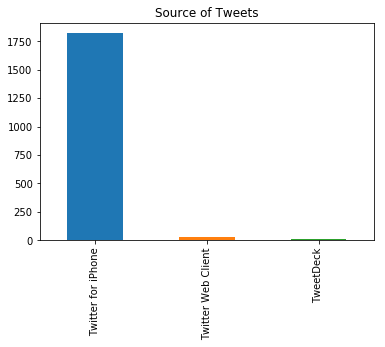

In [81]:
master_df.source.value_counts().plot(kind = 'bar', title = 'Source of Tweets')

# Insight #2

In [82]:
master_df.img_num.value_counts()

1    1579
2     188
3      60
4      30
Name: img_num, dtype: int64

In [83]:
master_df.img_num.value_counts(normalize=True)

1    0.850296
2    0.101239
3    0.032310
4    0.016155
Name: img_num, dtype: float64

### Most tweets contain one image approximately 85% of tweets.

# Insight #3

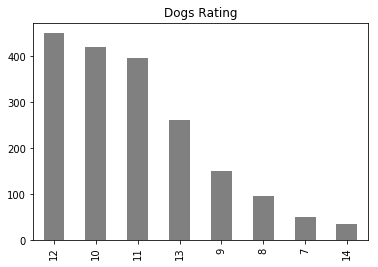

In [84]:
master_df.rating_numerator.value_counts().plot(kind='bar', color = 'grey', title = 'Dogs Rating')

In [85]:
master_df.rating_numerator.describe()

count    1857.000000
mean       10.929456
std         1.555330
min         7.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

### Average ratings between 10 and 11 and the most tweets rated 12.

# Insight #4

In [86]:
sum(master_df.retweet_count)

5314976

In [87]:
sum(master_df.favorite_count)

17205227

### Followers interact in the account by favorite tweets more than retweet it.

# Insight #5

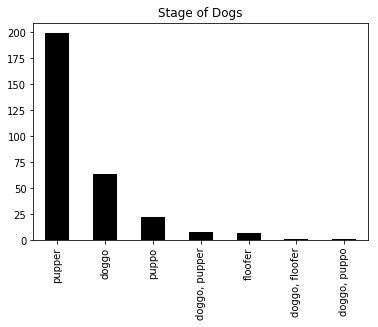

In [88]:
master_df.stage.value_counts().plot(kind='bar',title='Stage of Dogs', color='black')

In [89]:
master_df.stage.value_counts(normalize=True)


pupper            0.661130
doggo             0.209302
puppo             0.073090
doggo, pupper     0.026578
floofer           0.023256
doggo, floofer    0.003322
doggo, puppo      0.003322
Name: stage, dtype: float64

### pupper breed are the most popular which are 68% of dogs are pupper.

## Reference
- https://www.youtube.com/watch?v=fCMrO_VzeL8
- https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan
- https://www.youtube.com/watch?v=fCMrO_VzeL8
- https://www.youtube.com/watch?v=4WLEduoRH0A
- https://www.youtube.com/watch?v=XOxABiMhG2U
- https://www.youtube.com/watch?v=yO9ZihvadpE
- https://www.youtube.com/watch?v=gnUKkS964WQ
- https://stackoverflow.com/questions/41984972/merge-three-dataframes-based-on-column-in-df1-pandas-dataframes
- https://www.hackmath.net/en/calculator/potential-outliers